Epoch 010, Loss: 0.8017, Val Acc: 0.7140
Epoch 020, Loss: 0.3310, Val Acc: 0.7620
Epoch 030, Loss: 0.1484, Val Acc: 0.7740
Epoch 040, Loss: 0.0868, Val Acc: 0.7640
Epoch 050, Loss: 0.0534, Val Acc: 0.7640
Epoch 060, Loss: 0.0695, Val Acc: 0.7780
Epoch 070, Loss: 0.0513, Val Acc: 0.7740
Epoch 080, Loss: 0.0416, Val Acc: 0.7680
Epoch 090, Loss: 0.0436, Val Acc: 0.7640
Epoch 100, Loss: 0.0643, Val Acc: 0.7680
Epoch 110, Loss: 0.0386, Val Acc: 0.7700
Epoch 120, Loss: 0.0249, Val Acc: 0.7700
Epoch 130, Loss: 0.0320, Val Acc: 0.7540
Epoch 140, Loss: 0.0338, Val Acc: 0.7720
Epoch 150, Loss: 0.0274, Val Acc: 0.7640
Epoch 160, Loss: 0.0359, Val Acc: 0.7580
Epoch 170, Loss: 0.0304, Val Acc: 0.7580
Epoch 180, Loss: 0.0405, Val Acc: 0.7740
Epoch 190, Loss: 0.0278, Val Acc: 0.7700
Epoch 200, Loss: 0.0366, Val Acc: 0.7740
Test Accuracy: 0.7940


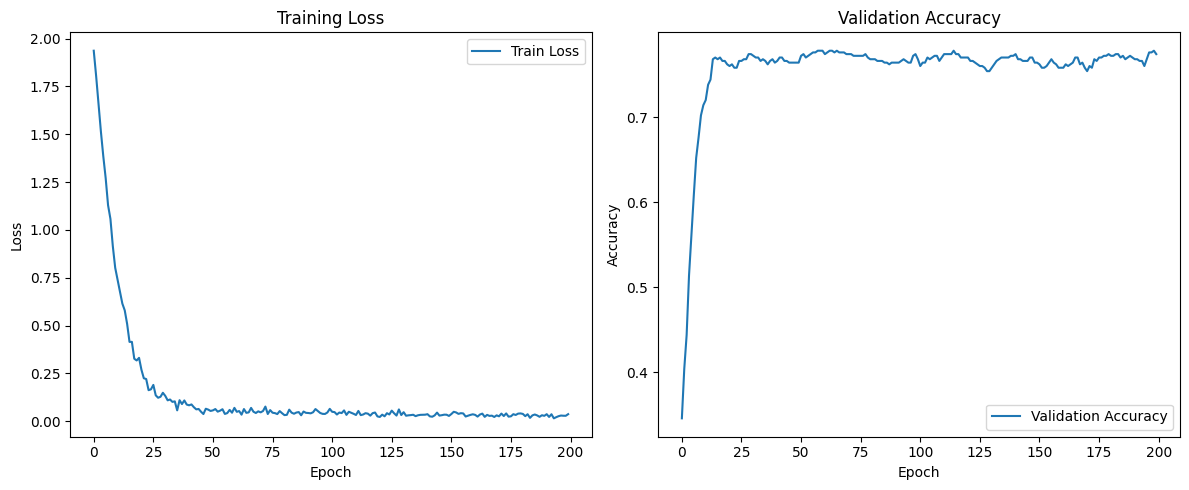

In [14]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
from torch_geometric.loader import DataLoader
import matplotlib.pyplot as plt

# Load the CORA dataset
dataset = Planetoid(root="./data/Cora", name="Cora")
data = dataset[0]  # Cora only has one graph

# Define the GNN model
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model, optimizer, and loss function
model = GNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Training and validation
train_losses = []
val_accuracies = []

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Evaluate on validation set
    model.eval()
    _, pred = model(data).max(dim=1)
    val_correct = pred[data.val_mask] == data.y[data.val_mask]
    val_acc = int(val_correct.sum()) / int(data.val_mask.sum())
    val_accuracies.append(val_acc)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1:03d}, Loss: {loss:.4f}, Val Acc: {val_acc:.4f}")

# Test accuracy
model.eval()
_, pred = model(data).max(dim=1)
test_correct = pred[data.test_mask] == data.y[data.test_mask]
test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training loss and validation accuracy
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


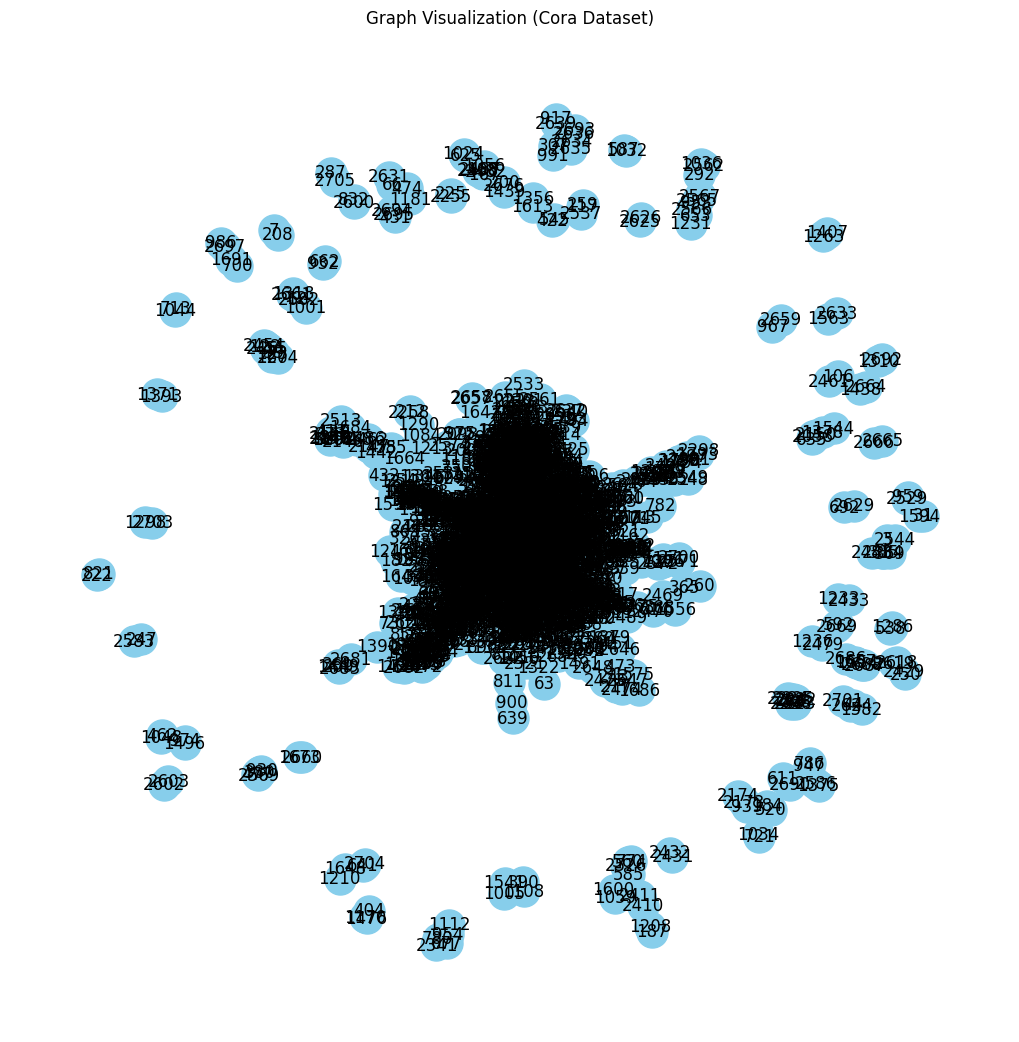

In [17]:
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

# Convert PyTorch Geometric data to NetworkX graph
G = to_networkx(data, to_undirected=True)

# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
plt.title("Graph Visualization (Cora Dataset)")
plt.show()

Epoch 001, Loss: 1.9545, Train Acc: 0.5143, Val Acc: 0.3100, Test Acc: 0.3150
Epoch 002, Loss: 1.8494, Train Acc: 0.6929, Val Acc: 0.4300, Test Acc: 0.4320
Epoch 003, Loss: 1.7301, Train Acc: 0.7571, Val Acc: 0.4740, Test Acc: 0.4830
Epoch 004, Loss: 1.5951, Train Acc: 0.8000, Val Acc: 0.5260, Test Acc: 0.5420
Epoch 005, Loss: 1.4296, Train Acc: 0.8643, Val Acc: 0.6140, Test Acc: 0.6340
Epoch 006, Loss: 1.2710, Train Acc: 0.9429, Val Acc: 0.7060, Test Acc: 0.7210
Epoch 007, Loss: 1.1865, Train Acc: 0.9500, Val Acc: 0.7360, Test Acc: 0.7560
Epoch 008, Loss: 0.9922, Train Acc: 0.9571, Val Acc: 0.7420, Test Acc: 0.7670
Epoch 009, Loss: 0.9653, Train Acc: 0.9643, Val Acc: 0.7480, Test Acc: 0.7770
Epoch 010, Loss: 0.8066, Train Acc: 0.9786, Val Acc: 0.7500, Test Acc: 0.7780
Epoch 011, Loss: 0.7215, Train Acc: 0.9857, Val Acc: 0.7700, Test Acc: 0.7830
Epoch 012, Loss: 0.6049, Train Acc: 0.9857, Val Acc: 0.7720, Test Acc: 0.7860
Epoch 013, Loss: 0.5539, Train Acc: 0.9857, Val Acc: 0.7760, Tes

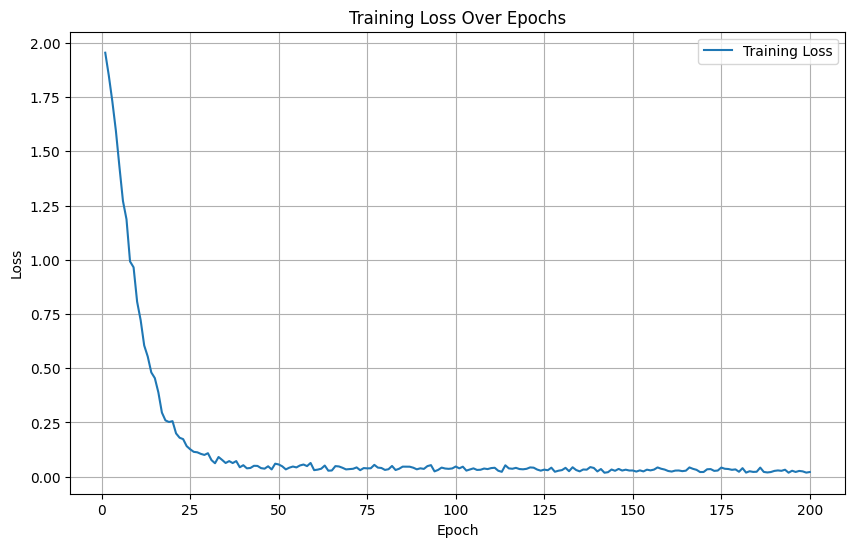

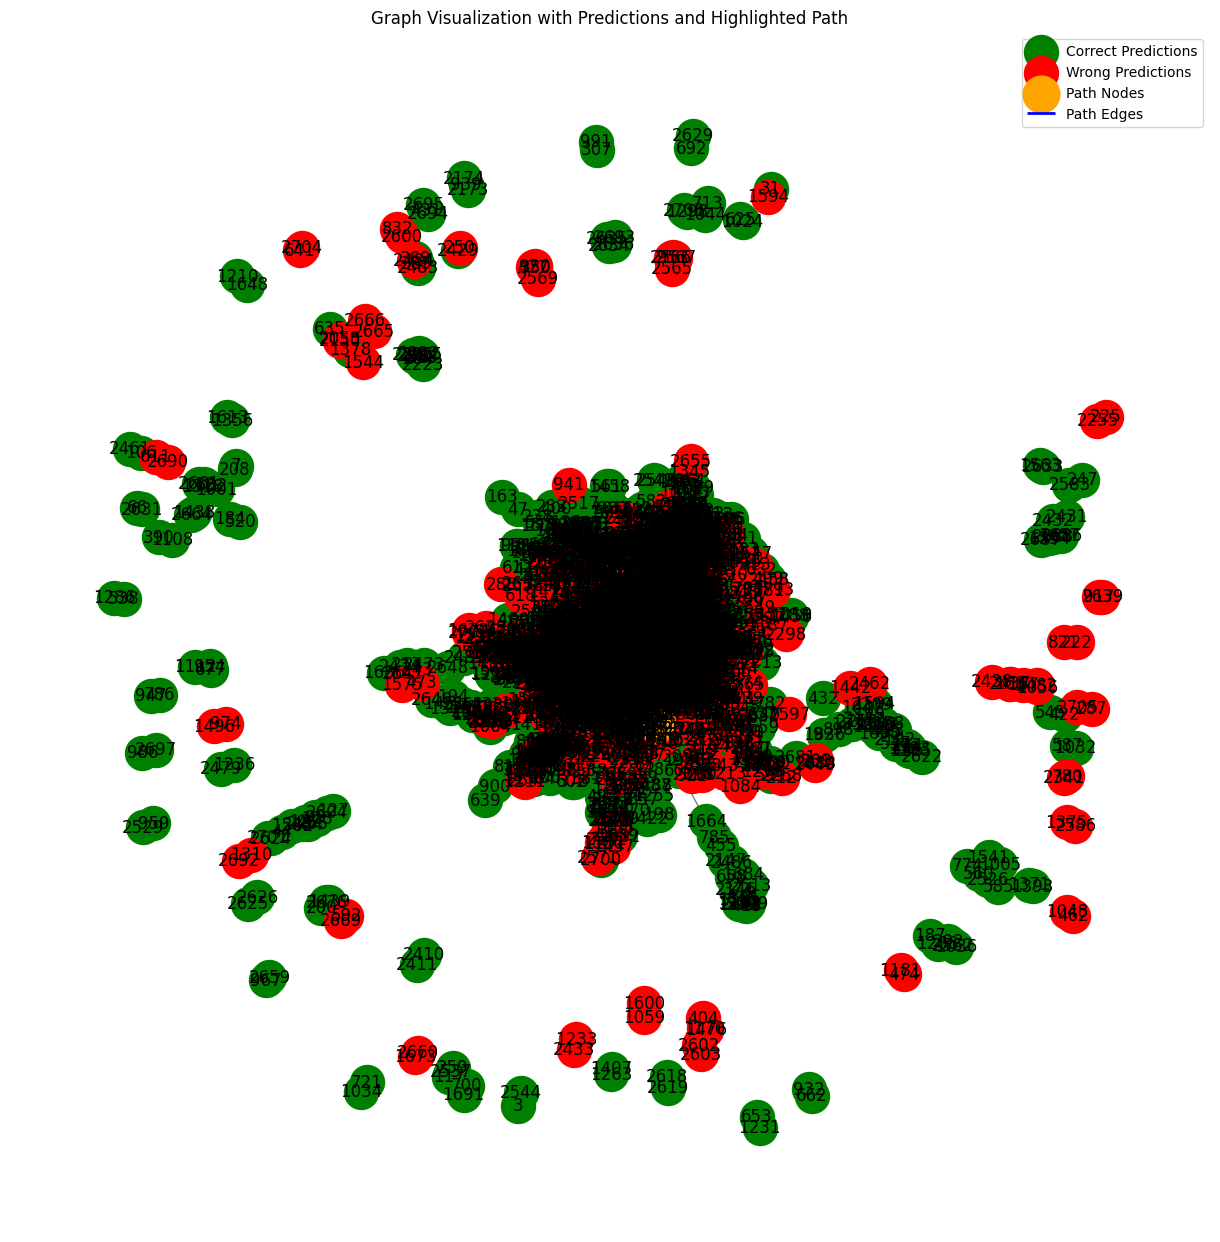

In [21]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx

# Load the Cora dataset
dataset = Planetoid(root="/tmp/Cora", name="Cora")
data = dataset[0]

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model, optimizer, and loss function
model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

# Training the model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Testing the model
def test():
    model.eval()
    logits = model(data)
    accs = []
    predictions = logits.max(1)[1]  # Predicted class labels
    for mask in [data.train_mask, data.val_mask, data.test_mask]:
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs, predictions

# Train the model and record the loss
losses = []
predictions = None
for epoch in range(200):
    loss = train()
    losses.append(loss)
    accs, predictions = test()
    train_acc, val_acc, test_acc = accs
    print(f"Epoch {epoch+1:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}")

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, 201), losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

# Convert PyTorch Geometric data to NetworkX graph
G = to_networkx(data, to_undirected=True)

# Get node-level predictions
correct_nodes = [i for i in range(data.num_nodes) if predictions[i] == data.y[i]]
wrong_nodes = [i for i in range(data.num_nodes) if predictions[i] != data.y[i]]

# Find and highlight a path between two random nodes
source_node = 0  # Example source node
target_node = 34  # Example target node
try:
    path = nx.shortest_path(G, source=source_node, target=target_node)
    path_edges = list(zip(path, path[1:]))

    # Plot the graph structure with highlighted nodes, edges, and path
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=500, edge_color='gray')
    nx.draw_networkx_nodes(G, pos, nodelist=correct_nodes, node_color='green', node_size=600, label="Correct Predictions")
    nx.draw_networkx_nodes(G, pos, nodelist=wrong_nodes, node_color='red', node_size=600, label="Wrong Predictions")
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='orange', node_size=700, label="Path Nodes")
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2, label="Path Edges")
    plt.title("Graph Visualization with Predictions and Highlighted Path")
    plt.legend(scatterpoints=1)
    plt.show()
except nx.NetworkXNoPath:
    print(f"No path found between node {source_node} and node {target_node}.")
